In [1]:
import pandas as pd
import numpy as np

In [2]:
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
adultDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [3]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


In [4]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
#https://scikit-learn.org/0.15/modules/generated/sklearn.tree.DecisionTreeClassifier.html

def makeDTModel(criterion,X_train,y_train) :
  model = DecisionTreeClassifier(criterion = "gini", #criterion
                                         max_leaf_nodes=10,max_depth=3, #alter max leaf nodes and max_depth
                                         random_state = 120).fit(X_train, y_train)
  return model

In [49]:
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

In [50]:
# display text and graphic representation of a tree classifier
#displayTree(cart_classifier, X)
#displayTree(c5_classifier, X)

def displayTree(cart_classifier, X) :
  tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(),filled = True)    
  print(tree.export_text(cart_classifier,feature_names=X.columns.values.tolist()))# wrap this line with the print keyword
     
  

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- capital-gains-losses <= 4718.50
|   |   |   |--- class: 0
|   |   |--- capital-gains-losses >  4718.50
|   |   |   |--- class: 1
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- capital-gains-losses <= 6457.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  6457.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  7073.50
|   |   |--- capital-gains-losses <= 30961.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  30961.50
|   |   |   |--- class: 1



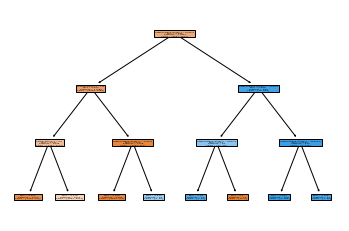

In [51]:
displayTree(cart_classifier, X)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- capital-gains-losses <= 4718.50
|   |   |   |--- class: 0
|   |   |--- capital-gains-losses >  4718.50
|   |   |   |--- class: 1
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- capital-gains-losses <= 6457.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  6457.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  7073.50
|   |   |--- capital-gains-losses <= 30961.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  30961.50
|   |   |   |--- class: 1



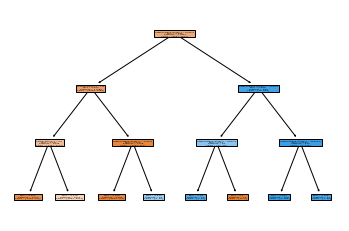

In [52]:
displayTree(c5_classifier, X)

In [61]:
# display text and heatmap of a confusion matrix
#displayCM(cart_classifier, X_train, y_train, X_test, y_test)
#displayCM(c5_classifier, X_train, y_train, X_test, y_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def displayCM(cart_classifier, X_train, y_train, X_test, y_test):
  cart_predictions = cart_classifier.predict(X_test)
  cart_cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cart_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  print(cart_cm)
  


[[2242    7]
 [ 583  128]]


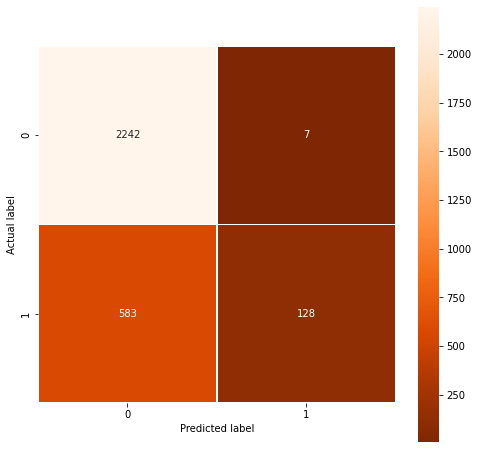

In [62]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2242    7]
 [ 583  128]]


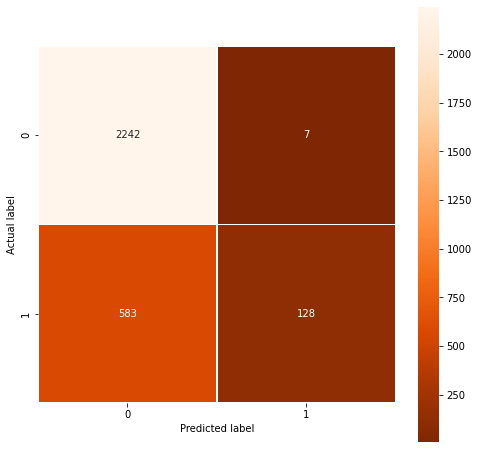

In [55]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

In [56]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.81, 0.80
C5.0 Training and Testing scores: 0.81, 0.80


In [57]:
# create and display plots of side-by-side model comparisons
#compareModels(cart_classifier, c5_classifier)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def compareModels(cart_classifier, c5_classifier):
  score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score
  # Record C5's classification accuracy on tarining and test datasets
  score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
  score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score
  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

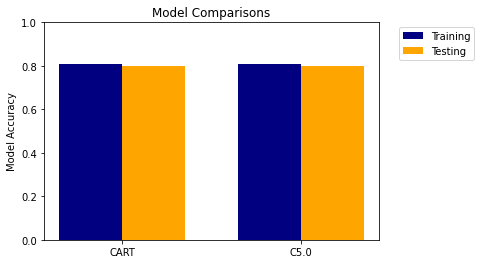

In [58]:
compareModels(cart_classifier, c5_classifier)